<a href="https://colab.research.google.com/github/bdrinconp/ml_stats_classes/blob/main/code_samples/clase3_regresion_multiple_gastos_medicos_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos.


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [ ]:
#!pip install --upgrade pip setuptools==57.5.0

In [ ]:
# instalar librerias
# ==============================================================================
!pip install regressors

In [ ]:
# importar librerias
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import regressors
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

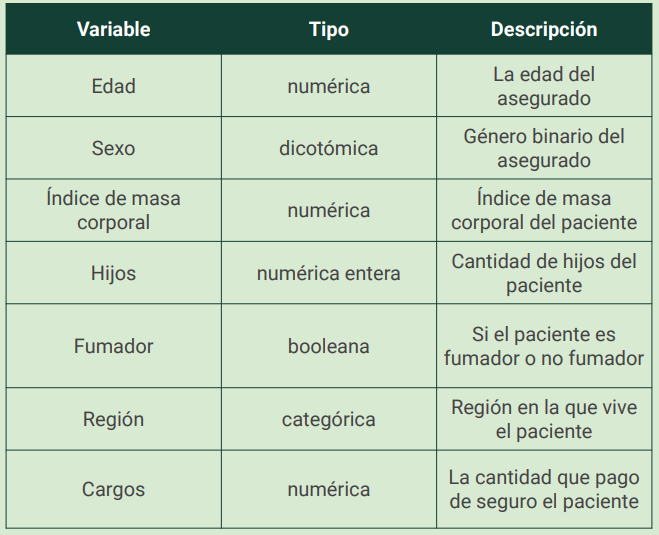

* age -> Edad
* sex -> Sexo
* bmi -> Indice de masa corporal
* children -> Hijos
* smoker -> Fumador
* region -> Región
* charges -> Cargos

In [ ]:
# Visualizar los datos
# ==============================================================================
df = pd.read_csv('insurance.csv')
print('Dimensión de los datos: ', df.shape)
df.head()

Dimensión de los datos:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Datos faltantes
# ==============================================================================
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Análisis y descripción los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

In [ ]:
# Descripción númerica de los datos
# ==============================================================================
num_cols = ['age', 'bmi', 'children', 'charges']
df[num_cols].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

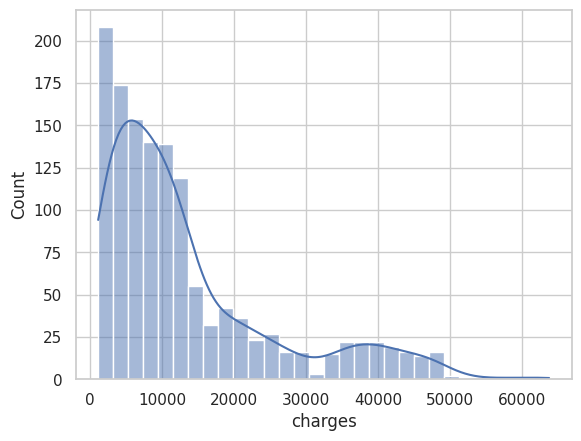

In [ ]:
# Distribución de los cargos "charges"
# ==============================================================================
sns.histplot(df, x = 'charges', kde  =True) #bins = 1,10,100

<Axes: xlabel='charges'>

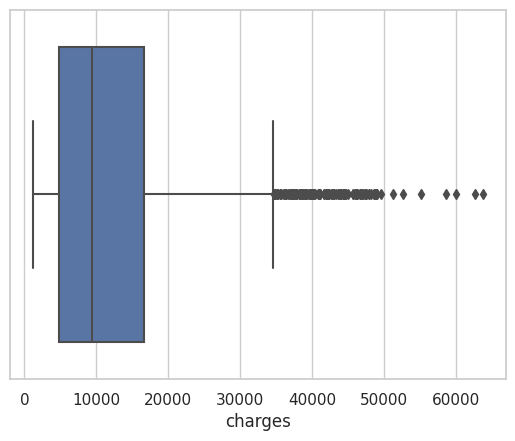

In [ ]:
# boxplot de los cargos "charges"
# ==============================================================================
sns.boxplot(df, x = 'charges')

In [ ]:
# Obtengamos algunas medidas descriptivas interesantes de los precios
# ==============================================================================

# Medidas de centralidad
print(f"El promedio de los cargos es de: ${df['charges'].mean()}")
print(f"La mediana de los cargos es de: ${df['charges'].median()}")
print(f"La moda de los cargos es de: ${df['charges'].mode()[0]}")
print("=======================================================================================")

# Medidas de dispersión
print(f"La varianza de los cargos es de: ${df['charges'].var()}")
print(f"La desviación estándar de los cargos es de: ${df['charges'].std()}")
print(f"El rango de los cargos es de: ${df['charges'].max() -df['charges'].min()}")
print("=======================================================================================")

# Medidas de posición
print(f"El minimo de los cargos es de: ${df['charges'].min()}")
print(f"El maximo de los cargos es de: ${df['charges'].max()}")
print(f"El rango percentil 25 (cuartil 1) de los cargos es de: ${df['charges'].quantile(0.25)}")
print(f"El rango percentil 75 (cuartil 3) de los cargos es de: ${df['charges'].quantile(0.75)}")
print(f"El rango intercuartilico de los cargos es de: ${df['charges'].quantile(0.75)-df['charges'].quantile(0.25)}")
#-----
p = 0.99  # Reemplaza este valor con el percentil que te interese.
percentil_p = df['charges'].quantile(p)
print(f"El percentil {p*100} de los cargos es: ${percentil_p}")
#-----

El promedio de los cargos es de: $13270.422265141257
La mediana de los cargos es de: $9382.033
La moda de los cargos es de: $1639.5631
La varianza de los cargos es de: $146652372.15285498
La desviación estándar de los cargos es de: $12110.011236694001
El rango de los cargos es de: $62648.554110000005
El minimo de los cargos es de: $1121.8739
El maximo de los cargos es de: $63770.42801
El rango percentil 25 (cuartil 1) de los cargos es de: $4740.28715
El rango percentil 75 (cuartil 3) de los cargos es de: $16639.912515
El rango intercuartilico de los cargos es de: $11899.625365
El percentil 99.0 de los cargos es: $48537.480726


Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [ ]:
# Distribución de los cargos "charges"
# ==============================================================================
df[df.charges>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [ ]:
# Nos quedamos con los valores inferiores a 50000 "charges"
# ==============================================================================
df = df[df.charges<50000]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos viendo cómo se distribuyen y correlacionan.

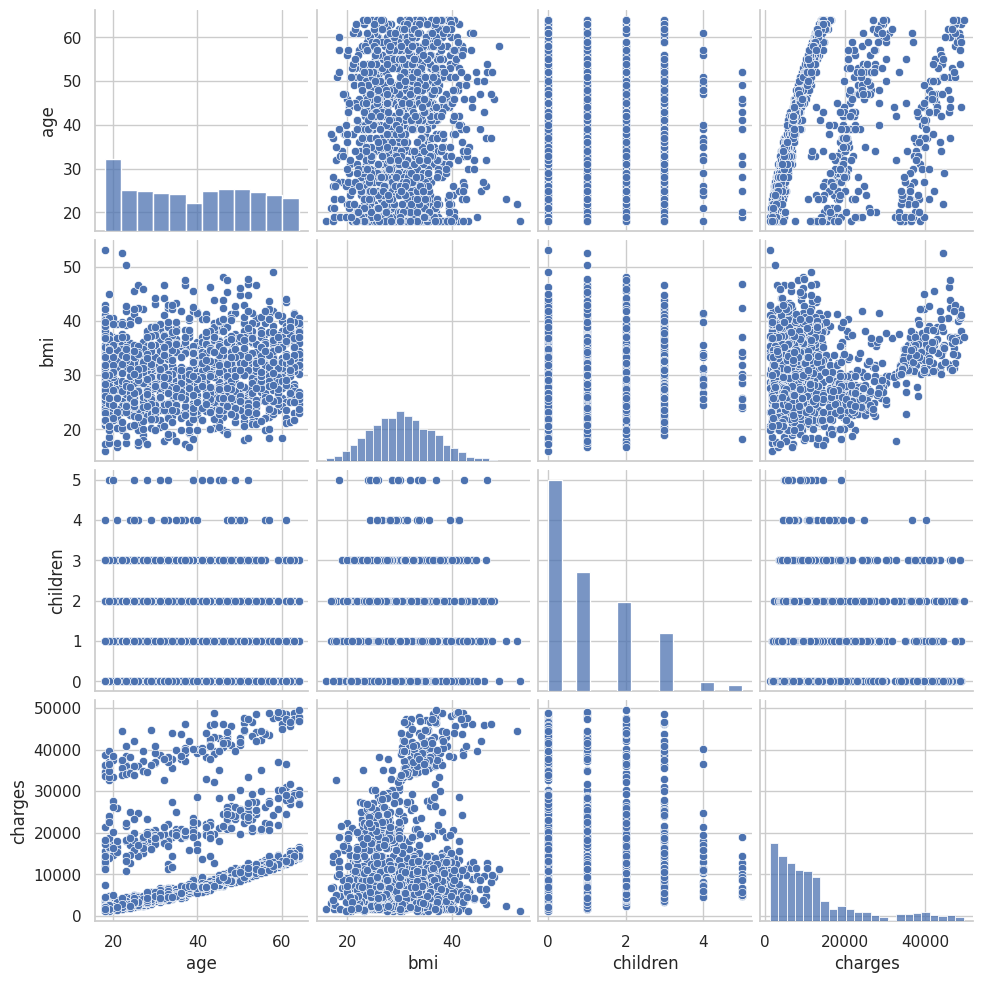

In [ ]:
# Correlación
# ==============================================================================
sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<Axes: >

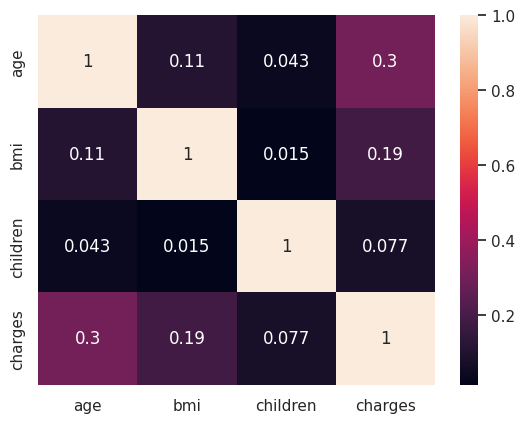

In [ ]:
# Correlación
# ==============================================================================
sns.heatmap(df[num_cols].corr(),annot=True)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función **[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)** de pandas.

[LECTURA IMPORTANTE: One hot encoding y label encoding](https://www.statology.org/label-encoding-vs-one-hot-encoding/)

En el procesamiento de datos para modelos de aprendizaje automático, la elección entre "One-Hot Encoding" y "Label Encoding" suele depender de la naturaleza de los datos y del modelo que se vaya a utilizar. A continuación, algunas consideraciones:

## One-Hot Encoding

**Naturaleza de los datos:** Útil para variables categóricas nominales que no tienen un orden intrínseco.

**Modelos:** Es especialmente útil para modelos lineales, donde una asignación numérica podría ser malinterpretada como una ordenación.

**Dimensionalidad:** Aumenta la dimensionalidad de los datos. Esto puede ser un problema si tienes muchas categorías.

**Interpretación:** Hace que el modelo sea más fácil de entender e interpretar.

## Label Encoding

**Naturaleza de los datos:** Más adecuado para variables categóricas ordinales, donde las categorías tienen un orden natural.

**Modelos:** Puede ser adecuado para modelos basados en árboles como árboles de decisión y bosques aleatorios, que son capaces de manejar la naturaleza ordinal de las variables.

**Dimensionalidad:** No aumenta la dimensionalidad de los datos.

**Interpretación:** Puede ser más difícil de interpretar en comparación con One-Hot Encoding, especialmente si se usa con modelos que no son basados en árboles.

**Resumen:**
1. Usar One-Hot Encoding para variables nominales y cuando el modelo es sensible a la interpretación numérica de las categorías.

2. Usar Label Encoding para variables ordinales y modelos que pueden manejar relaciones de orden.

Ahora la verás en acción

In [ ]:
# Revisión de cateogiras
# ==============================================================================
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Correlación
# ==============================================================================
df_dummies = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Creando modelos
Primero se usará un modelo con todas las variables.

In [ ]:
# Librerias para la construcción del modelos
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# División de los datos para construir el modelo
# ==============================================================================
X_cols = list(set(df_dummies.columns)-set(['charges']))
y_col = ['charges']

# X variables independientes, y variable dependiente
X = df_dummies[X_cols].values
y = df_dummies[y_col].values

# Visión en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

# Aplicamos las transformaciones
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Ajustamos el modelo
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
print("Los coeficientes del modelo son: ", model.coef_)
print("El intercepto del modelo es: ", model.intercept_)

Los coeficientes del modelo son:  [[-0.00249338 -0.03907323 -0.04468001  0.14444732  0.30639879 -0.01402131
   0.78622435  0.06546785]]
El intercepto del modelo es:  [-0.00223107]


¿Cómo seria la formula asociada al modelo?
$$ Y_{charges} = ... $$

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [ ]:
# Importar metricas
import sklearn.metrics as metrics

# MSE y R2 - test
# ==============================================================================
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7753
mse:  0.2608


El siguiente código muestra un resumen general de los resultados.

In [ ]:
# Otra forma de visualizar los resultados
from regressors import stats
# ==============================================================================
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:
# Otra forma de visualizar los resultados
# ==============================================================================
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.0334 -0.1158  0.1019 0.2133 0.9485


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.002231    0.031532  -0.0708  0.943645
sex_male         -0.002493    0.031662  -0.0787  0.937291
region_southwest -0.039073    0.036110  -1.0821  0.280205
region_southeast -0.044680    0.039380  -1.1346  0.257574
bmi               0.144447    0.031387   4.6022  0.000006
age               0.306399    0.031770   9.6443  0.000000
region_northwest -0.014021    0.034893  -0.4018  0.688123
smoker_yes        0.786224    0.029542  26.6134  0.000000
children          0.065468    0.031413   2.0841  0.038103
---
R-squared:  0.77531,    Adjusted R-squared:  0.76834
F-statistic: 111.28 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

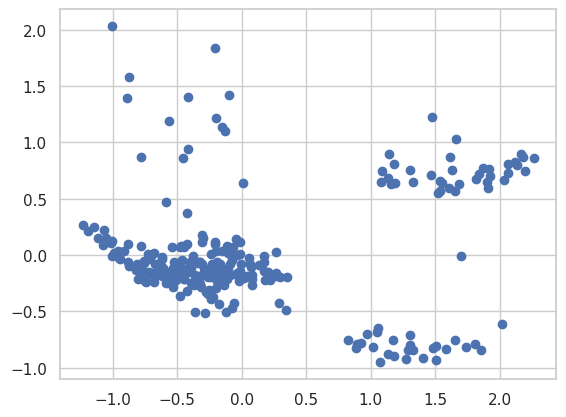

In [ ]:
# Residuales
# ==============================================================================
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [ ]:
# Datos segundo modelo
# ==============================================================================
df_second = df_dummies.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

Analizando el segundo modelo

In [ ]:
# Datos segundo modelo
# ==============================================================================
X_cols2 = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children']
y_col2 = ['charges']

X2 = df_second[X_cols2].values
y2 = df_second[y_col2].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state = 42)
sc_x2 = StandardScaler().fit(X2)
sc_y2 = StandardScaler().fit(y2)

X_train2 = sc_x2.transform(X_train2)
X_test2 = sc_x2.transform(X_test2)
y_train2 = sc_y2.transform(y_train2)
y_test2 = sc_y2.transform(y_test2)

model2 = LinearRegression(fit_intercept=False)
model2.fit(X_train2,y_train2)
y_pred2 = model2.predict(X_test2)

In [ ]:
# Metricas test
# ==============================================================================
mse2 = metrics.mean_squared_error(y_test2,y_pred2)
r22 = metrics.r2_score(y_test2, y_pred2)

print("r2 ", r22.round(4))
print("mse: ", mse2.round(4))

r2  0.8944
mse:  0.1226


In [ ]:
# Coeficientes
# ==============================================================================
model2.coef_ = model2.coef_.reshape(-1)

y_test2 = y_test2.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.0334 -0.1158  0.1019 0.2133 0.9485


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.002231    0.031532  -0.0708  0.943645
sex_male         -0.002493    0.031662  -0.0787  0.937291
region_southwest -0.039073    0.036110  -1.0821  0.280205
region_southeast -0.044680    0.039380  -1.1346  0.257574
bmi               0.144447    0.031387   4.6022  0.000006
age               0.306399    0.031770   9.6443  0.000000
region_northwest -0.014021    0.034893  -0.4018  0.688123
smoker_yes        0.786224    0.029542  26.6134  0.000000
children          0.065468    0.031413   2.0841  0.038103
---
R-squared:  0.77531,    Adjusted R-squared:  0.76834
F-statistic: 111.28 on 8 features


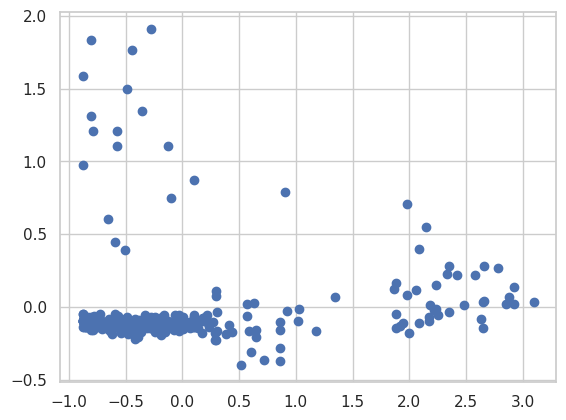

In [ ]:
# Residuales
# ==============================================================================
residuals2 = np.subtract(y_test2, y_pred2.reshape(-1))
plt.scatter(y_pred2, residuals2)
plt.show()